# K Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\my pc\Desktop\Machine Learning Projects\ECommerce_consumer behaviour.csv")

In [3]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [4]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [6]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [7]:
df['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [8]:
df['days_since_prior_order'].fillna(0,inplace=True)

In [9]:
df['days_since_prior_order']=df['days_since_prior_order'].astype(np.int64)

In [10]:
df['days_since_prior_order'].isnull().sum()

0

In [11]:
df.drop(['product_name','department'],axis=1,inplace=True)

# Data Visualization

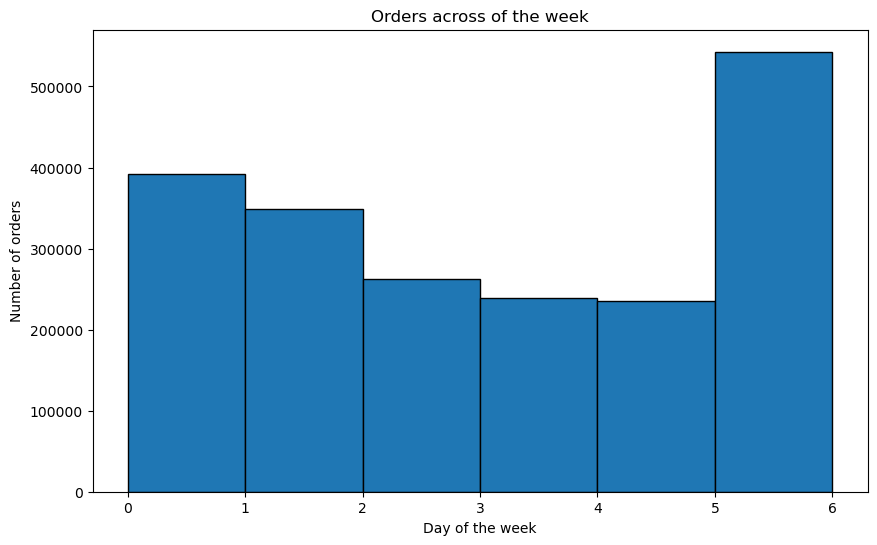

In [12]:
plt.figure(figsize=(10,6))
plt.hist(df['order_dow'],bins=6,edgecolor='black')
plt.title('Orders across of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of orders')
plt.show()

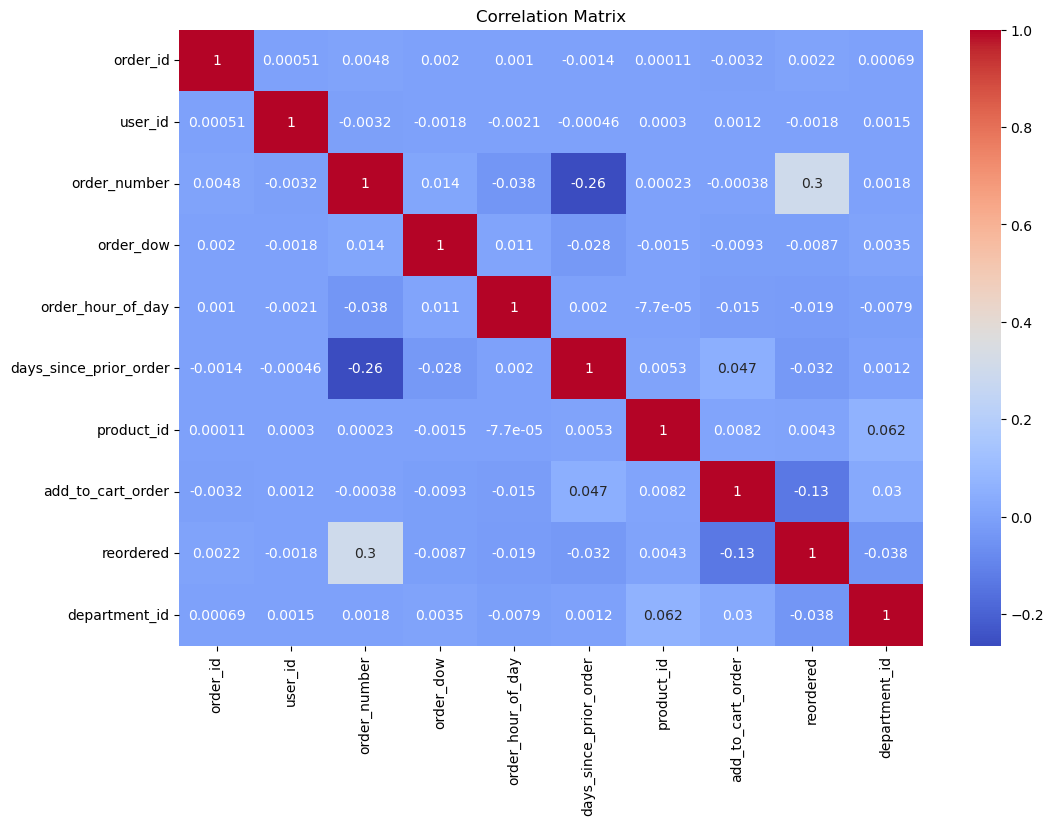

In [13]:
corr_matrix=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

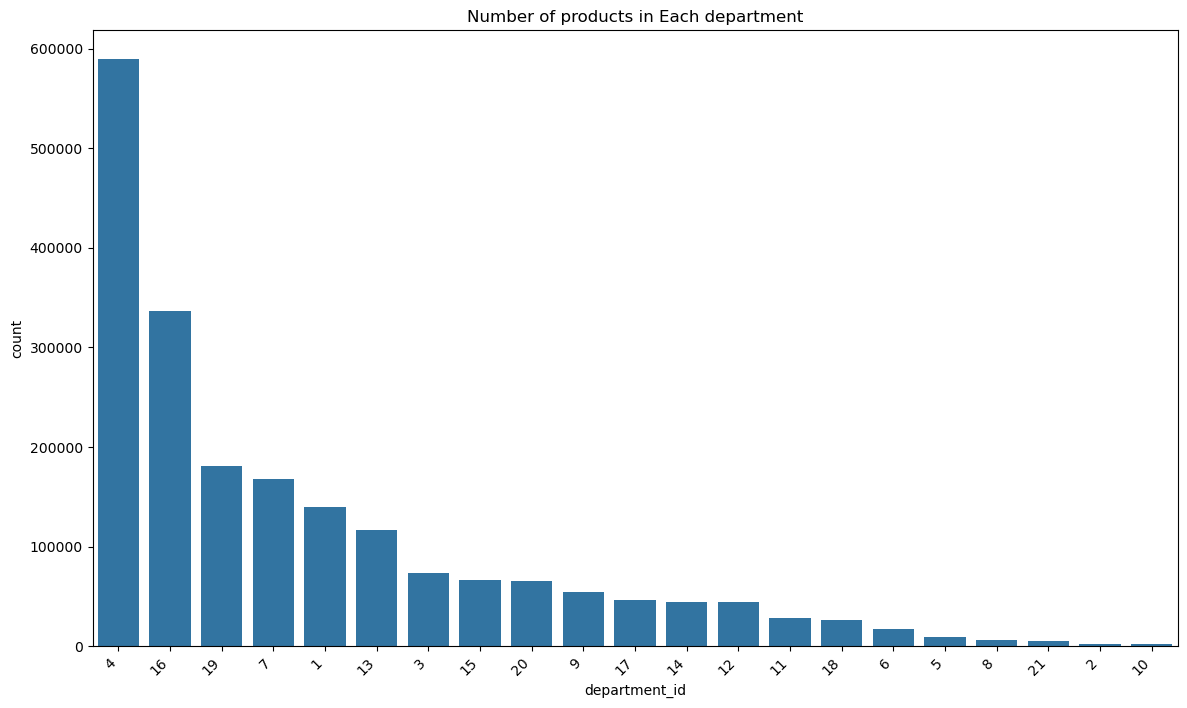

In [14]:
plt.figure(figsize=(14,8))
sns.countplot(x='department_id',data=df,order=df['department_id'].value_counts().index)
plt.title('Number of products in Each department')
plt.xticks(rotation=45,ha='right')
plt.show()

In [15]:
product_counts=df['product_id'].value_counts()
top_products=product_counts.head(20)

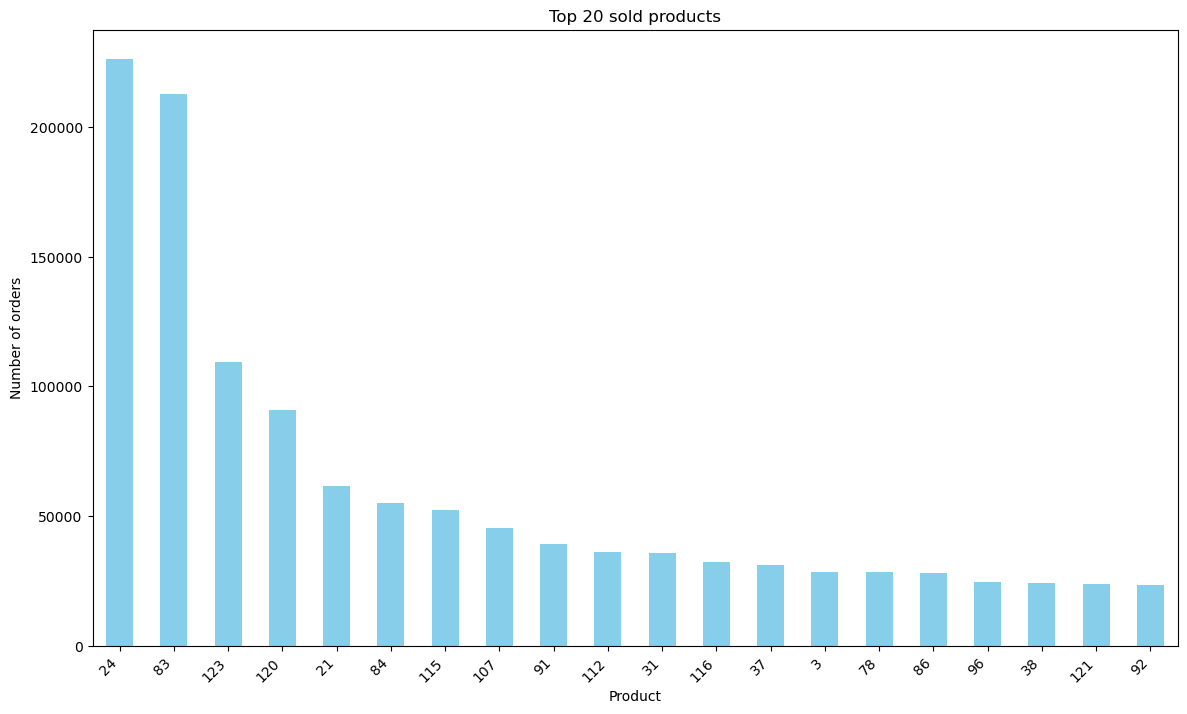

In [16]:
plt.figure(figsize=(14,8))
top_products.plot(kind='bar',color='skyblue')
plt.title('Top 20 sold products')
plt.xlabel('Product')
plt.ylabel('Number of orders')
plt.xticks(rotation=45,ha='right')
plt.show()

# Model Building

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.decomposition import PCA

In [18]:
X=df[['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 
      'add_to_cart_order', 'reordered', 'department_id']]

In [20]:
inertia_values=[]
for i in range(1,12):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    

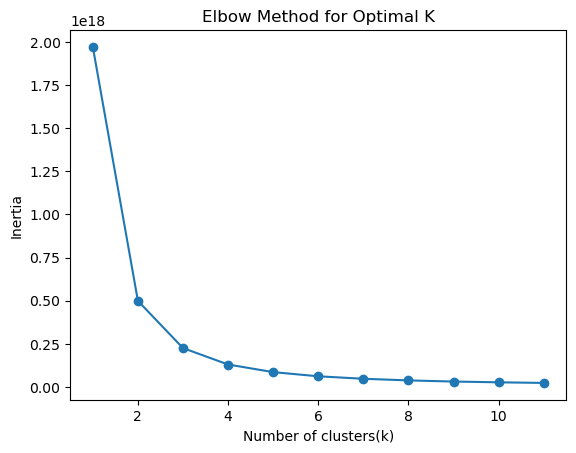

In [22]:
plt.plot(range(1,12),inertia_values,marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia')
plt.show()

In [24]:
n_clusters=5
kmeans=KMeans(n_clusters=n_clusters,random_state=100)
labels=kmeans.fit_predict(X)
pca=PCA(n_components=2)
principal_components=pca.fit_transform(X)

df=pd.DataFrame(principal_components,columns=['PC1','PC2'])
df['Cluster']=labels

C:\Users\my pc\anaconda3\envs\tf2.7\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


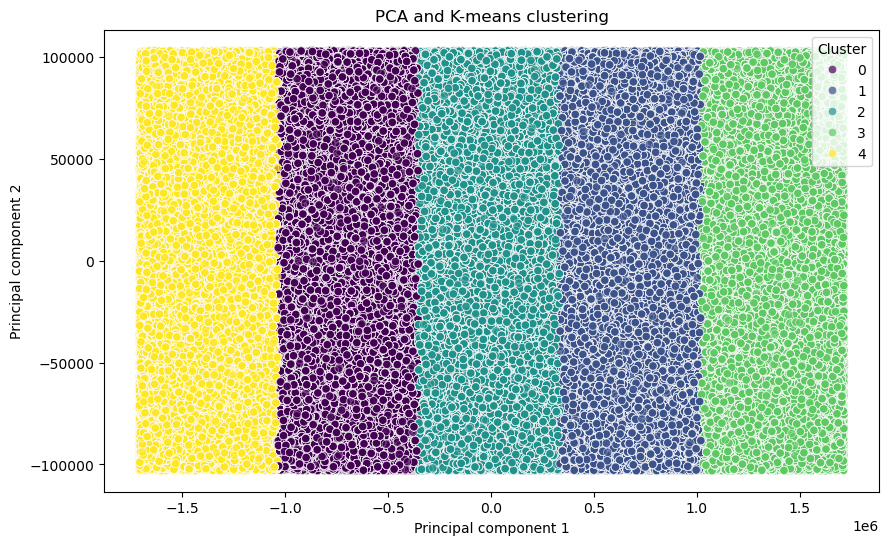

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1',y='PC2',hue='Cluster',data=df, palette='viridis',alpha=0.7)
plt.title('PCA and K-means clustering')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(title='Cluster')
plt.show()